In [7]:
import numpy as np
import tensorflow.compat.v1 as tf

A = tf.placeholder(tf.float32, (1, 1))
x = tf.placeholder(tf.float32, (1, 1))
b = tf.matmul(A, x)

with tf.Session() as sess:
    out = sess.run(b, feed_dict = {A : [[1]], x : [[1]]})   # A = 행 벡터, x = 열 벡터
    
    print("{0}".format(out))
    print("Shape of A : {0}".format(A.shape))
    print("Shape of x : {0}".format(x.shape))
    print("Shape of b : {0}".format(b.shape))

[[1.]]
Shape of A : (1, 1)
Shape of x : (1, 1)
Shape of b : (1, 1)


In [10]:
A = tf.placeholder(tf.float32, (1, 2))
x = tf.placeholder(tf.float32, (2, 1))
b = tf.matmul(A, x)

with tf.Session() as sess:
    out = sess.run(b, feed_dict = {A : [[1, 4]], x : [[1], [2]]})  # A = 행 벡터, x = 열 벡터
    
    print("{0}".format(out))
    print("Shape of A : {0}".format(A.shape))
    print("Shape of x : {0}".format(x.shape))
    print("Shape of b : {0}".format(b.shape))

[[9.]]
Shape of A : (1, 2)
Shape of x : (2, 1)
Shape of b : (1, 1)


In [11]:
A = tf.placeholder(tf.float32, (3, 2))
x = tf.placeholder(tf.float32, (2, 1))
b = tf.matmul(A, x)

with tf.Session() as sess:
    out = sess.run(b, feed_dict = {A : [[1, 4], [9, 5], [4, 0]], x : [[1], [2]]})  # A = 행 벡터, x = 열 벡터
    
    print("{0}".format(out))
    print("Shape of A : {0}".format(A.shape))
    print("Shape of x : {0}".format(x.shape))
    print("Shape of b : {0}".format(b.shape))

[[ 9.]
 [19.]
 [ 4.]]
Shape of A : (3, 2)
Shape of x : (2, 1)
Shape of b : (3, 1)


In [25]:
A = tf.placeholder(tf.float32, (4, 4))
b = tf.placeholder(tf.float32, (4, 1))
x = tf.matrix_solve(A, b)

with tf.Session() as sess:
    out = sess.run(x, feed_dict = {A : [[1, 4, 2, 0], [9, 5, 0, 0], [4, 0, 2, 4], [6, 1, 8, 3]],
                                   b : [[15], [19], [26], [44]]})  # A %*% x = b
                                                                   # 근데 A값과 b값(결과값)을 알아서 x값을 matrix_solve로 구한거임.
    print("{0}".format(out))
    print("Shape of A : {0}".format(A.shape))
    print("Shape of x : {0}".format(x.shape))
    print("Shape of b : {0}".format(b.shape))

[[0.9999999]
 [2.0000002]
 [2.9999995]
 [4.       ]]
Shape of A : (4, 4)
Shape of x : (4, 1)
Shape of b : (4, 1)


In [26]:
A = tf.placeholder(tf.float32, (4, 4))
x = tf.placeholder(tf.float32, (4, 1))
b = tf.matmul(A, x)

with tf.Session() as sess:
    out = sess.run(b, feed_dict = {A : [[1, 4, 2, 0], [9, 5, 0, 0], [4, 0, 2, 4], [6, 1, 8, 3]],
                                   x : out})  # A %*% out (x값) = b값 (위의 b값)
    
    print("{0}".format(out))
    print("Shape of A : {0}".format(A.shape))
    print("Shape of x : {0}".format(x.shape))
    print("Shape of b : {0}".format(b.shape))

[[15.      ]
 [19.      ]
 [26.      ]
 [43.999996]]
Shape of A : (4, 4)
Shape of x : (4, 1)
Shape of b : (4, 1)


In [29]:
x = tf.placeholder(tf.float32, (5, 1))
w = tf.Variable([[2.0]])
b = tf.Variable(1.0)
y = tf.matmul(x, w) + b

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    data, out = sess.run([x, y], feed_dict = {x : [[-1.0], [-0.1], [0.9], [2.0], [3.1]]})
    
    print("{0}".format(out))
    print("Shape of x : {0}".format(x.shape))
    print("Shape of w : {0}".format(w.shape))
    print("Shape of b : {0}".format(b.shape))
    print("Shape of y : {0}".format(y.shape))

[[-1. ]
 [ 0.8]
 [ 2.8]
 [ 5. ]
 [ 7.2]]
Shape of x : (5, 1)
Shape of w : (1, 1)
Shape of b : ()
Shape of y : (5, 1)


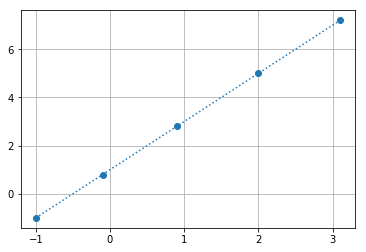

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline
%config inlineBackend.figure_format = 'retina'

plt.plot(data, out, 'o:')
plt.grid()

In [50]:
x = 2 * np.random.rand(100, 1)  #   1000000 입력 시 답에 근접
y = 4 + 3 * x + np.random.randn(100, 1)
x_b = np.c_[np.ones((100, 1)), x]

theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.99047507],
       [3.01840708]])

In [51]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.99047507],
       [10.02728923]])

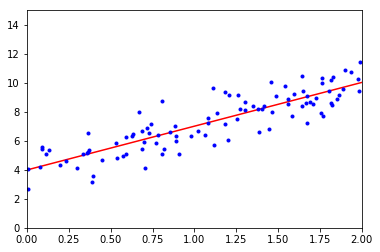

In [52]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [68]:
W = tf.Variable([0.3], dtype = tf.float32)
b = tf.Variable([-0.3], dtype = tf.float32)
x = tf.placeholder(tf.float32)

linear_model = W * x + b
y = tf.placeholder(tf.float32)
loss = tf.reduce_sum(tf.square(linear_model - y))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)


In [87]:
x_train = [[1], [2], [3], [4]]
y_train = [[0.1], [-0.8], [-1.9], [-3]]

MaxIter = 1300
init = tf.global_variables_initializer()

In [88]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(MaxIter) :
        curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict = {x : x_train, y : y_train})
        
        print(i, curr_W, curr_b, curr_loss)       
        
        sess.run(train, feed_dict = {x : x_train, y : y_train})        
        
    curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict ={x : x_train, y : y_train})

(0, array([0.3], dtype=float32), array([-0.3], dtype=float32), 22.680002)
(1, array([-0.204], dtype=float32), array([-0.448], dtype=float32), 4.287936)
(2, array([-0.376], dtype=float32), array([-0.48336002], dtype=float32), 2.2186627)
(3, array([-0.437728], dtype=float32), array([-0.4814912], dtype=float32), 1.9492959)
(4, array([-0.46279293], dtype=float32), array([-0.4674263], dtype=float32), 1.8792768)
(5, array([-0.47563192], dtype=float32), array([-0.44947362], dtype=float32), 1.8321879)
(6, array([-0.48435804], dtype=float32), array([-0.43038934], dtype=float32), 1.7885627)
(7, array([-0.49166536], dtype=float32), array([-0.4110866], dtype=float32), 1.7462347)
(8, array([-0.49844882], dtype=float32), array([-0.3918666], dtype=float32), 1.704943)
(9, array([-0.5050062], dtype=float32), array([-0.3728275], dtype=float32), 1.6646372)
(10, array([-0.511437], dtype=float32), array([-0.35400006], dtype=float32), 1.6252913)
(11, array([-0.51777476], dtype=float32), array([-0.33539265],

In [107]:
from matplotlib.patches import Rectangle
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [126]:
def l2_loss(w, b, x, y) :
    return np.sum(np.square(w * x + b - y))

def visualize_l2(w, b, x_train, y_train, loss) :
    loss_name = loss.__name__
    plt.plot(x_train, y_train, 'ok')
    plt.plot(x_train, w * x_train + b, '--kx')
    [plt.text(x, y, '($x_{0}$, $y_{0}$) = ({1}, {2})'.format(k, x, y),
        horizontalalignment = 'right') 
        for k, (x, y) in enumerate(zip(x_train, y_train), 1)]
    currentAxis = plt.gca()
    
    for xx, yy in zip(x_train, y_train) :
        currentAxis.add_patch(Rectangle((xx, yy), (w * xx + b - yy), (w * xx + b - yy), alpha = 0.3, 
                                        facecolor = 'gray', edgecolor = 'k'))
        plt.grid()
        plt.axis('equal')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("w = {}, b = {} ({} = [:1.2f])".format(w, b, loss_name, loss(w, b, x_train, y_train)))

In [118]:
x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])

plt.figure(figsize = (15, 9))

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

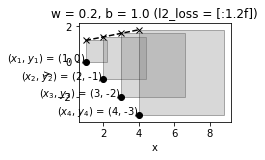

In [127]:
plt.subplot(2, 2, 1)
visualize_l2(0.2, 1.0, x_train, y_train, l2_loss)
plt.show()

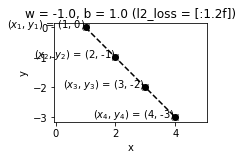

In [128]:
plt.subplot(2, 2, 2)
visualize_l2(-1.0, 1.0, x_train, y_train, l2_loss)